In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_excel('C:/Users/efe44/Desktop/veri madenciliği proje/OnlineRetail.xlsx')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


In [3]:
df['CustomerID'].fillna(0, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None


C:\Users\efe44\AppData\Local\Temp\ipykernel_12964\1956826077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(0, inplace=True)


In [4]:
label_encoder = LabelEncoder()
df_encoded = df.copy()
df['StockCode'] = df['StockCode'].astype(str)
df['Country'] = df['Country'].astype(str)
df_encoded['StockCode'] = label_encoder.fit_transform(df['StockCode'])
df_encoded['Country'] = label_encoder.fit_transform(df['Country'])

In [5]:
df_encoded['InvoiceYear'] = df['InvoiceDate'].dt.year
df_encoded['InvoiceMonth'] = df['InvoiceDate'].dt.month
df_encoded['InvoiceDay'] = df['InvoiceDate'].dt.day
df_encoded['InvoiceTime'] = label_encoder.fit_transform(df['InvoiceDate'].dt.time)

In [6]:
features = df_encoded[['CustomerID', 'StockCode', 'Quantity', 'InvoiceYear', 'InvoiceMonth', 'InvoiceDay', 'InvoiceTime', 'Country']]
features.head()

,CustomerID,StockCode,Quantity,InvoiceYear,InvoiceMonth,InvoiceDay,InvoiceTime,Country
0,17850.0,3536,6,2010,12,1,63,36
1,17850.0,2794,6,2010,12,1,63,36
2,17850.0,3044,8,2010,12,1,63,36
3,17850.0,2985,6,2010,12,1,63,36
4,17850.0,2984,6,2010,12,1,63,36


In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns, index=features.index)
print(scaled_features_df.head())

   CustomerID  StockCode  Quantity  InvoiceYear  InvoiceMonth  InvoiceDay  \
0    0.940265   2.021115 -0.016289    -3.428776      1.267257   -1.618537   
1    0.940265   1.225665 -0.016289    -3.428776      1.267257   -1.618537   
2    0.940265   1.493674 -0.007118    -3.428776      1.267257   -1.618537   
3    0.940265   1.430424 -0.016289    -3.428776      1.267257   -1.618537   
4    0.940265   1.429352 -0.016289    -3.428776      1.267257   -1.618537   

   InvoiceTime   Country  
0    -2.119787  0.279651  
1    -2.119787  0.279651  
2    -2.119787  0.279651  
3    -2.119787  0.279651  
4    -2.119787  0.279651  


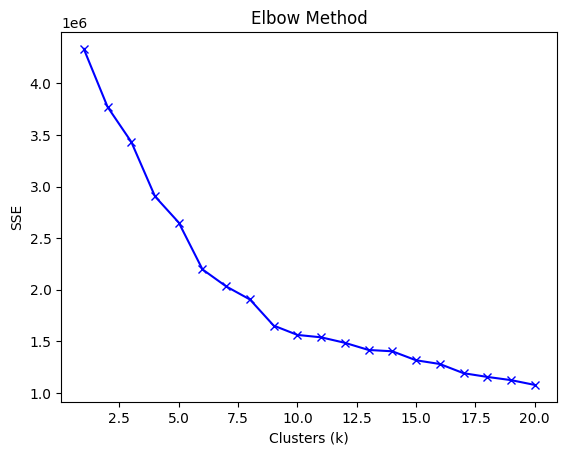

In [8]:
sse = []
K = range(1, 21) 

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=44)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.plot(K, sse, 'bx-')
plt.xlabel('Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=9, random_state=44)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters
df_encoded['Cluster'] = clusters

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster,InvoiceYear,InvoiceMonth,InvoiceDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,4,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4,2010,12,1


In [ ]:
df.to_excel('C:/Users/efe44/Desktop/veri madenciliği proje/Clustered_OnlineRetail.xlsx', index=False)

In [10]:
cluster_sizes = df['Cluster'].value_counts()
print(cluster_sizes)

Cluster
0    105116
2    104182
7     99163
1     97099
3     60613
4     41931
6     33801
5         2
8         2
Name: count, dtype: int64


In [11]:
grouped = df_encoded.groupby('Cluster')
print(grouped.mean(numeric_only=True))

           StockCode      Quantity  UnitPrice    CustomerID    Country  \
Cluster                                                                  
0        1615.651043     11.408891   2.810591  15477.643013  35.781223   
1        1328.773180      1.718936   4.386218      2.771553  35.994459   
2        1600.336574     10.930305   2.823311  15511.794801  35.800829   
3        3274.267665      9.998482  12.417115  10426.784535  35.859948   
4        1569.134721      7.980993   6.155664   9768.538647  35.213088   
5        2283.000000 -77605.000000   1.560000  14396.000000  36.000000   
6        1632.194639     16.414574   5.084359  12770.341380  11.290051   
7        1104.326684     11.859534   3.032541  15155.832770  35.777598   
8        2283.000000  77605.000000   1.560000  14396.000000  36.000000   

         InvoiceYear  InvoiceMonth  InvoiceDay  InvoiceTime  
Cluster                                                      
0        2011.000000      9.745091    7.291782   363.987642  

In [12]:
print(grouped.std(numeric_only=True))

          StockCode     Quantity   UnitPrice   CustomerID   Country  \
Cluster                                                               
0        732.694875    38.412904    4.513941  1735.065864  1.387599   
1        726.082527    70.977611    4.489882   188.457469  0.219096   
2        714.604725    55.119476    3.616311  1618.875551  1.338336   
3        365.585834    61.750275  260.784494  7279.083585  1.108915   
4        998.430790    58.846417  140.558194  7642.671902  3.950918   
5        315.369624  4794.183976    0.735391  2899.137803  0.000000   
6        919.949760    37.931718   57.059363  2562.456437  4.303969   
7        568.763238    49.422800    5.346530  2598.494690  1.411770   
8        315.369624  4794.183976    0.735391  2899.137803  0.000000   

         InvoiceYear  InvoiceMonth  InvoiceDay  InvoiceTime  
Cluster                                                      
0            0.00000      1.811123    4.087056   136.472253  
1            0.00000      3.4656

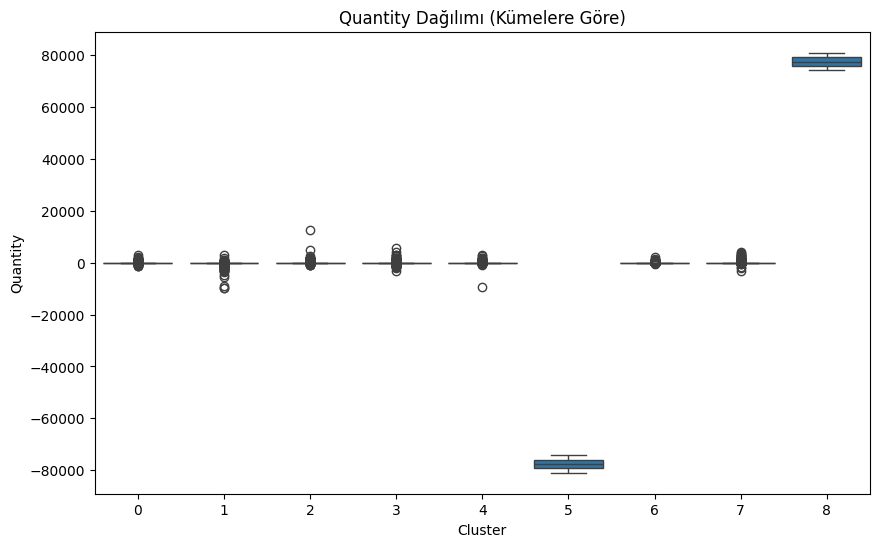

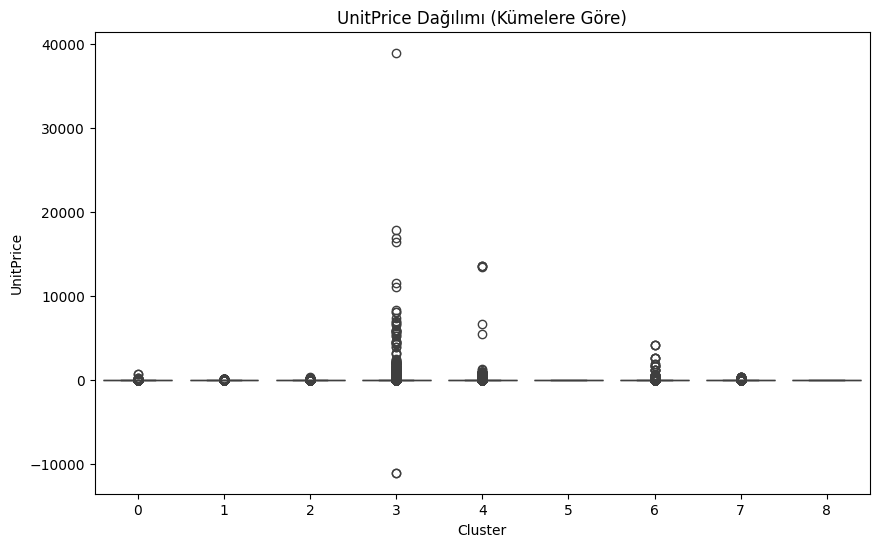

In [15]:
for column in ['Quantity', 'UnitPrice']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'{column} Dağılımı (Kümelere Göre)')
    plt.show()

In [14]:
unique_customers = df.groupby('Cluster')['CustomerID'].nunique()
print(unique_customers)


Cluster
0    2444
1       5
2    2469
3    3206
4     937
5       2
6     304
7    2572
8       2
Name: CustomerID, dtype: int64


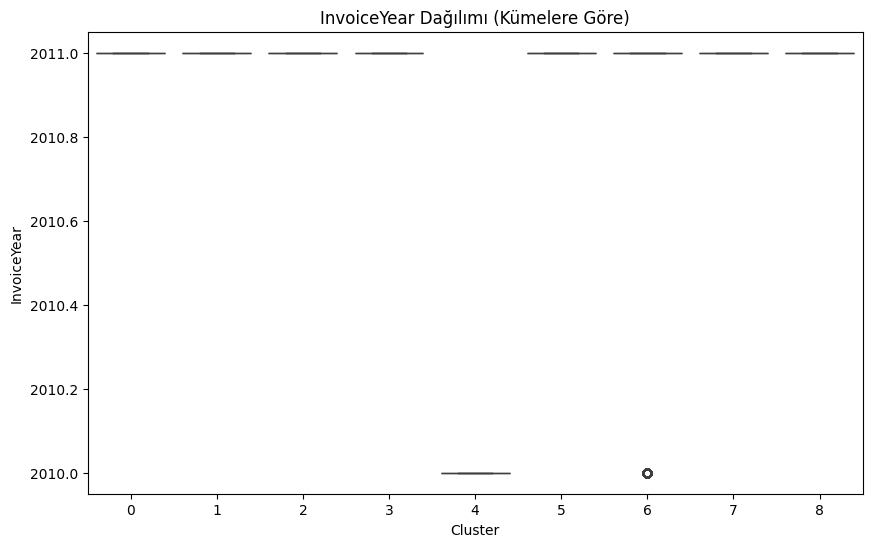

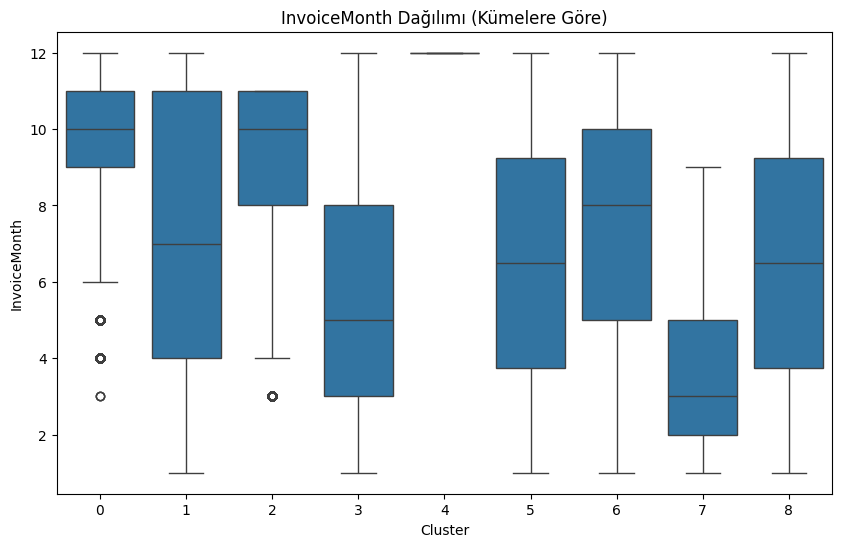

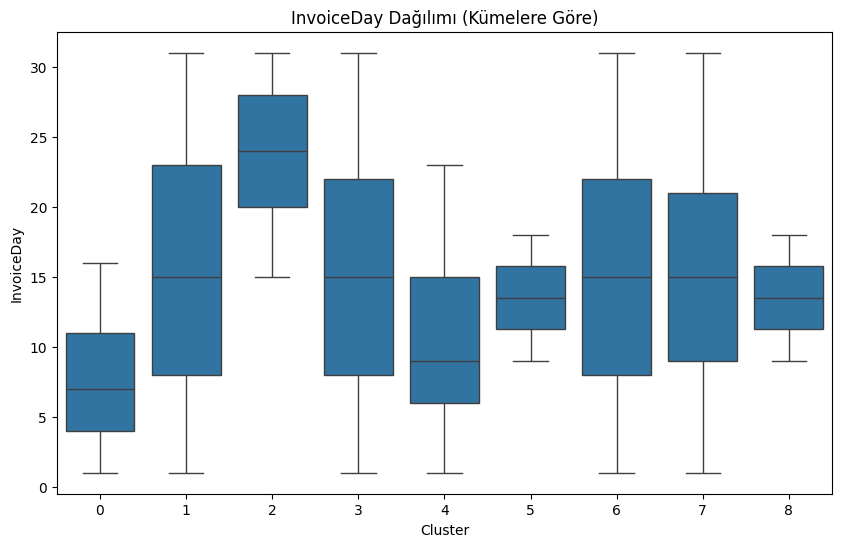

In [17]:
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df['InvoiceDay'] = df['InvoiceDate'].dt.day


time_features = ['InvoiceYear', 'InvoiceMonth', 'InvoiceDay']

for column in time_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=column, data=df)
    plt.title(f'{column} Dağılımı (Kümelere Göre)')
    plt.show()


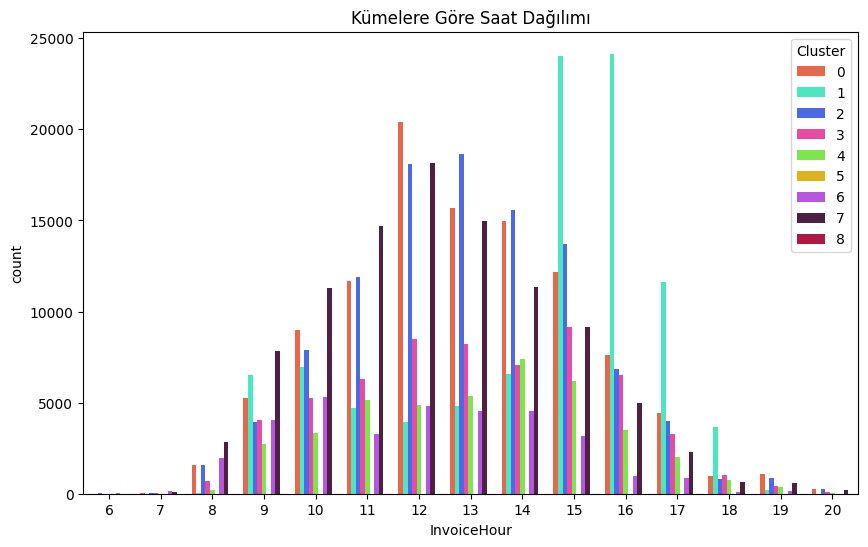

In [34]:
df['InvoiceHour'] = df['InvoiceDate'].dt.hour

custom_colors = ['#FF5733', '#33FFCE', '#335BFF', '#FF33A8', '#75FF33', '#FFC300', '#BF42F5', '#581845', '#C70039']

plt.figure(figsize=(10, 6))
sns.countplot(x='InvoiceHour', hue='Cluster', data=df, palette=custom_colors)  # Özel renk paleti kullanımı
plt.title("Kümelere Göre Saat Dağılımı")
plt.show()



In [23]:
for i in range(0, 10):
    cluster_0 = df[df['Cluster'] == i]
    print(f'-------------------Cluster {i}:-----------------------')
    print(cluster_0.describe())
    print('----------------------------------------------------')


-------------------Cluster 0:-----------------------
            Quantity                    InvoiceDate      UnitPrice  \
count  105116.000000                         105116  105116.000000   
mean       11.408891  2011-09-30 05:52:05.193120256       2.810591   
min     -1296.000000            2011-03-01 16:34:00       0.000000   
25%         2.000000            2011-09-02 12:37:00       1.250000   
50%         4.000000            2011-10-10 12:00:00       1.790000   
75%        12.000000            2011-11-10 16:58:00       3.750000   
max      3000.000000            2011-12-09 12:49:00     649.500000   
std        38.412904                            NaN       4.513941   

          CustomerID   Cluster  InvoiceYear   InvoiceMonth     InvoiceDay  
count  105116.000000  105116.0     105116.0  105116.000000  105116.000000  
mean    15477.643013       0.0       2011.0       9.745091       7.291782  
min         0.000000       0.0       2011.0       3.000000       1.000000  
25%     1409

In [25]:

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

pd.set_option('display.width', 1000)

country_distribution = df.groupby(['Cluster', 'Country']).size().unstack(fill_value=0)
print(country_distribution)


Country  Australia  Austria  Bahrain  Belgium  Brazil  Canada  Channel Islands  Cyprus  Czech Republic  Denmark  EIRE  European Community  Finland  France  Germany  Greece  Hong Kong  Iceland  Israel  Italy  Japan  Lebanon  Lithuania  Malta  Netherlands  Norway  Poland  Portugal  RSA  Saudi Arabia  Singapore  Spain  Sweden  Switzerland  USA  United Arab Emirates  United Kingdom  Unspecified
Cluster                                                                                                                                                                                                                                                                                                                                                                                                  
0                0        0        0        0       0       0                0       0               0        0     0                   0        0       0        0       0          0        0       0      0      

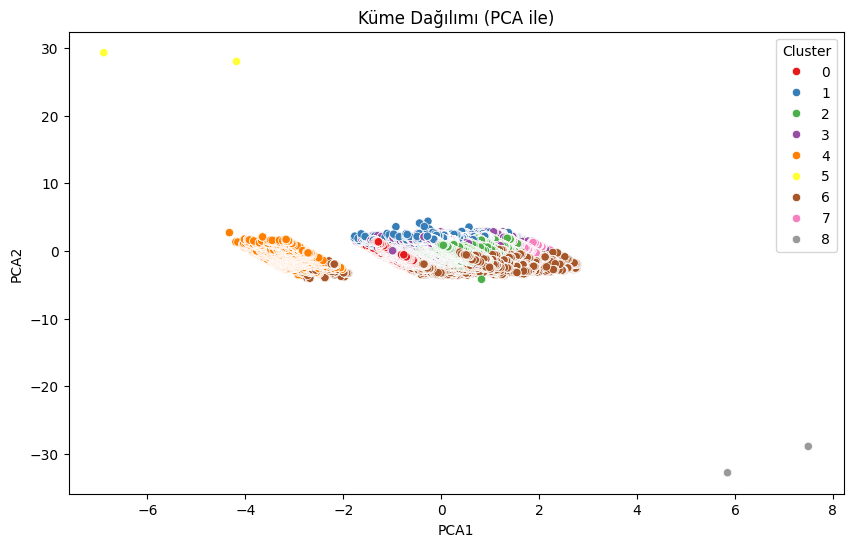

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
df['PCA1'] = pca_features[:, 0]
df['PCA2'] = pca_features[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title('Küme Dağılımı (PCA ile)')
plt.show()
